## Project Setup
# Data Analysis/ Plotting

Importing the datasets from the previous project setup and creating plots for them

*Please note. For actual analysis of the data please look at Final Data Summary file in the Github. This is solely the notebook with code to illustrate plots and data analysis

In [1]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sportsreference.ncaab.roster import Player
from sportsreference.nba.roster import Roster

This is just importing the file we created in the project set up. Should be in the same directory 

In [2]:
nba_df = pd.read_csv("NBA_Data.csv")
ncaa_df = pd.read_csv("NCAA_Data.csv")

Because certain players had a place holder -999 for stats that weren't present, we can replace them with Nan values now in order to make sure they do not get plotted and also prevent them from skewing the data

In [3]:
ncaa_df = ncaa_df.replace(-999.0, np.nan)
ncaa_df.head()

,Name,Career Height,Career Weight,Career Points,Career Games,Career Assists,Career Def Rebounds,Career Off Rebounds,Career Turnovers,Career Blocks,...,Defensive Win Shares,Career Usage Percentage,Box Plus Minus,True Shooting Per,PPG,APG,TPG,BPG,SPG,RPG
0,De'Andre Hunter,79.0,225.0,882.0,71.0,111.0,220.0,90.0,83.0,35.0,...,4.2,24.7,10.5,0.606,12.422535,1.563380,1.169014,0.492958,0.577465,4.366197
1,Trae Young,74.0,180.0,876.0,32.0,279.0,111.0,14.0,167.0,8.0,...,1.1,37.1,11.1,0.585,27.375000,8.718750,5.218750,0.250000,1.687500,3.906250
2,Vince Carter,79.0,215.0,1267.0,103.0,197.0,NaN,NaN,83.0,80.0,...,5.8,NaN,NaN,0.622,12.300971,1.912621,0.805825,0.776699,1.106796,-19.398058
3,Cam Reddish,80.0,218.0,485.0,36.0,70.0,113.0,20.0,96.0,21.0,...,2.2,25.3,4.5,0.499,13.472222,1.944444,2.666667,0.583333,1.555556,3.694444
4,Kevin Huerter,79.0,190.0,779.0,65.0,196.0,271.0,53.0,126.0,44.0,...,3.2,19.3,7.7,0.603,11.984615,3.015385,1.938462,0.676923,0.800000,4.984615


Finally this ensures that only names found in both datasets are included, and makes sure they are the same size. This is done again from the previous notebook as a failsafe, as if they do not share the same names list, the plot will not work

In [4]:
nbanames = list(nba_df["Name"])
ncaa_df = ncaa_df[ncaa_df['Name'].isin(nbanames)]
ncaa_df = ncaa_df.reset_index(drop = True)

## Individual Stats Scatter Plots and Box Plots
This is where individual stats from each dataframe gets plotted, first with a scatterplot. Where the x-axis represents an NCAA statistic, and the y-axis represents the same player's statistic in the NBA. These statistics can vary, of course, as they are meant to represent how one statistic from college carries over to another in the NBA. 
Finally, a red horizontal line represents the average statistic from the NBA, and the vertical line represents the average statistic in the NCAA

When it comes to the bar plot, each player gets categorized into below average in college and above average in the NBA(- College + NBA), above average college and above average NBA (+ College + NBA), both in blue, and the opposite, (- College - NBA) and (+College - NBA) in red. Where the college stat is the one specified as the x-axis in the scatter plot, and the NBA stat is the y-axis is the corresponding NBA statistic.

Finally, these all save to the ProjectPlots folder found in the Github.

#### NCAA height vs NBA Box Plus Minus

Box plus minus is a stat that tells how a player contributes to winning when the player is on the court. For example, a -3 indicates when the player was playing, the team was 3 points behind the oppenent. 

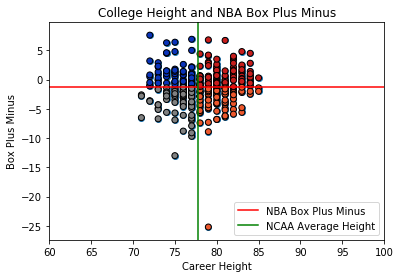

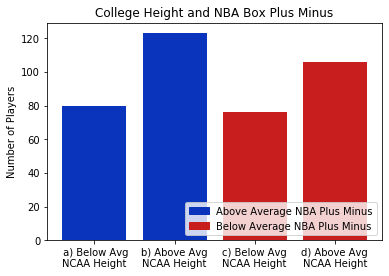

Average NCAA Height: 77.78441558441558 
Average NBA Box Plus Minus: -1.217142857142857 


In [5]:
#x and y is specified here, as explained above. These come directly from the imported DataFrame
x = ncaa_df["Career Height"]
y = nba_df["Box Plus Minus"]
plt.scatter(x, y)
plt.xlabel("Career Height")
plt.ylabel("Box Plus Minus")
#these average lines are to plot on the scatterplot, as well as to compare to in the boxplot
averageliney = nba_df["Box Plus Minus"].mean()
averagelinex = ncaa_df["Career Height"].mean()
plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Box Plus Minus")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Average Height')
means = []
color = []
#colorizing each player based on how they compare to the average, also adding to the means count to plot the box plot
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Height and NBA Box Plus Minus")
plt.xlim([60, 100])
plt.savefig('ProjectPlots/heightvsboxplusminusScatter.png')
plt.show()
#This is now for the box plot, looking at the means count and displaying how many fit in each category
names = [' a) Below Avg\nNCAA Height', 'b) Above Avg\nNCAA Height', 'c) Below Avg\nNCAA Height', 'd) Above Avg\nNCAA Height' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)
plt.title("College Height and NBA Box Plus Minus")
plt.ylabel("Number of Players")
blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA Plus Minus')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA Plus Minus')
plt.legend(handles=[blue_patch, red_patch], loc = 'lower right')
plt.savefig('ProjectPlots/heightvsboxplusminusBar.png')
plt.show()
print(f"Average NCAA Height: {averagelinex} ")
print(f"Average NBA Box Plus Minus: {averageliney} ")

#### NCAA weight vs NBA Box Plus Minus

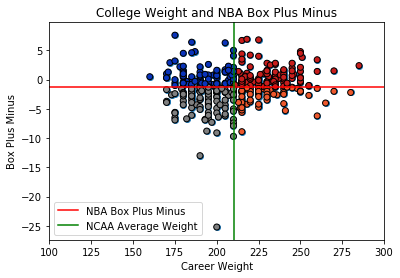

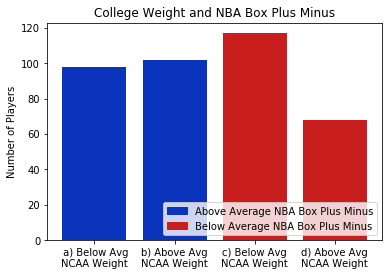

College Average:  210.0371352785146
NBA Average:  -1.217142857142857


In [6]:
#this follows the exact format as before, only changing the statistic to plot
x = ncaa_df["Career Weight"]
y = nba_df["Box Plus Minus"]
plt.scatter(x, y)
plt.xlabel("Career Weight")
plt.ylabel("Box Plus Minus")
averageliney = nba_df["Box Plus Minus"].mean()
averagelinex = ncaa_df["Career Weight"].mean()

plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Box Plus Minus")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Average Weight')

means = []
color = []
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Weight and NBA Box Plus Minus")
plt.xlim([100, 300])

plt.savefig('ProjectPlots/weightvsboxplusminusScatter.png')
plt.show()

#names = ['- College\n+ NBA', '+ College\n+ NBA', '- College\n- NBA', '+ College\n- NBA' ]
names = [' a) Below Avg\nNCAA Weight', 'b) Above Avg\nNCAA Weight', 'c) Below Avg\nNCAA Weight', 'd) Above Avg\nNCAA Weight' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)

plt.title("College Weight and NBA Box Plus Minus")
plt.ylabel("Number of Players")

blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA Box Plus Minus')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA Box Plus Minus')
plt.legend(handles=[blue_patch, red_patch], loc = 'lower right')
plt.savefig('ProjectPlots/weightvsboxplusminusBar.png')
plt.show()
print("College Average: ",averagelinex)
print("NBA Average: ",averageliney)

#### NCAA Field Goal Percentage vs NBA Field Goal percentage
This one looks at a direct comparison, seeing how exactly they translate

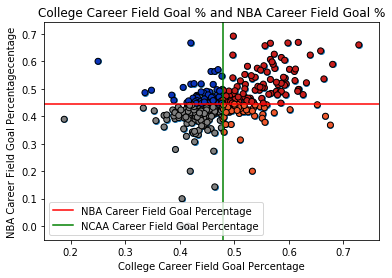

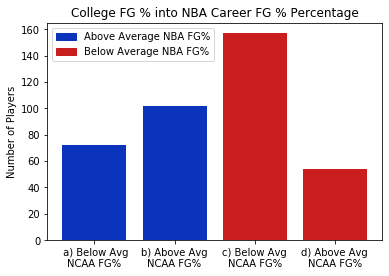

College Average:  0.47845052083333334
NBA Average:  0.44561558441558474


In [7]:
#Once again following the same pattern of code as before, only changing the x and y values
x = ncaa_df["Career Field Goal Percentage"]
y = nba_df["Career Field Goal Percentage"]
plt.scatter(x, y)
plt.xlabel("College Career Field Goal Percentage")
plt.ylabel("NBA Career Field Goal Percentagecentage")
averageliney = (nba_df["Career Field Goal Percentage"].mean())
averagelinex = ncaa_df["Career Field Goal Percentage"].mean()


plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Career Field Goal Percentage")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Career Field Goal Percentage')

means = []
color = []
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
        
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Career Field Goal % and NBA Career Field Goal %")

plt.savefig('ProjectPlots/fgvsfgScatter.png')
plt.show()

#names = ['- College\n+ NBA', '+ College\n+ NBA', '- College\n- NBA', '+ College\n- NBA' ]
names = [' a) Below Avg\nNCAA FG%', 'b) Above Avg\nNCAA FG%', 'c) Below Avg\nNCAA FG%', 'd) Above Avg\nNCAA FG%' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)
plt.ylabel("Number of Players")
plt.title("College FG % into NBA Career FG % Percentage")
blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA FG%')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA FG%')
plt.legend(handles=[blue_patch, red_patch])
plt.savefig('ProjectPlots/fgvsfgBar.png')
plt.show()
print("College Average: ", averagelinex)
print("NBA Average: ", averageliney)

#### NCAA games played vs NBA Win Shares

Win shares once again takes a look at how many plays a player makes to contribute to winning, however this includes offense and defense

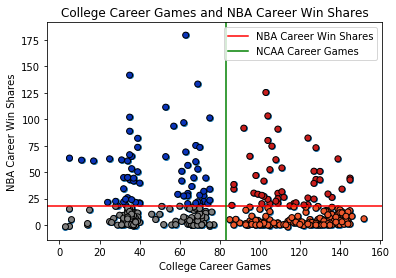

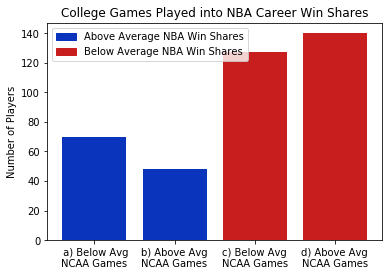

Average Games Played in college:  83.05194805194805
NBA Win Shares Average:  18.065454545454525


In [8]:

x = ncaa_df["Career Games"]
y = nba_df["Career Win Shares"]
plt.scatter(x, y)
plt.xlabel("College Career Games")
plt.ylabel("NBA Career Win Shares")
averageliney = (nba_df["Career Win Shares"].mean())
averagelinex = ncaa_df["Career Games"].mean()

plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Career Win Shares")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Career Games')

means = []
color = []
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Career Games and NBA Career Win Shares")

plt.savefig('ProjectPlots/gamesvswinsharesScatter.png')
plt.show()

#names = ['- College\n+ NBA', '+ College\n+ NBA', '- College\n- NBA', '+ College\n- NBA' ]
names = [' a) Below Avg\nNCAA Games', 'b) Above Avg\nNCAA Games', 'c) Below Avg\nNCAA Games', 'd) Above Avg\nNCAA Games' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)
plt.ylabel("Number of Players")
blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA Win Shares')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA Win Shares')
plt.legend(handles=[blue_patch, red_patch])
plt.title("College Games Played into NBA Career Win Shares")
plt.savefig('ProjectPlots/gamesvswinsharesBar.png')
plt.show()
print("Average Games Played in college: ", averagelinex)
print("NBA Win Shares Average: ", averageliney)

#### NCAA games played vs NBA Career PER

PER stands for Player Efficiency rating, meaning this measures an overall individual performance

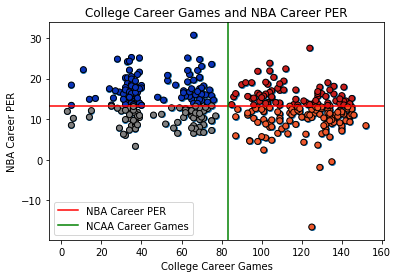

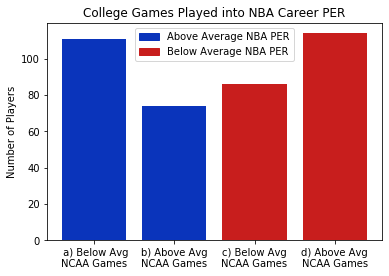

Average PER of NBA players:  13.30467532467532


In [9]:
#Did not print average career games, same as before
x = ncaa_df["Career Games"]
y = nba_df["Career PER"]
plt.scatter(x, y)
plt.xlabel("College Career Games")
plt.ylabel("NBA Career PER")
averageliney = (nba_df["Career PER"].mean())
averagelinex = ncaa_df["Career Games"].mean()
plt.axhline(y=averageliney, color='r', linestyle='-', label = "NBA Career PER")
plt.axvline(x=averagelinex, color='g', linestyle='-', label = 'NCAA Career Games')

means = []
color = []
for item1, item2 in zip(list(x), list(y)):
    if(item1 > averagelinex and item2 > averageliney):
        color.append('#C81E1D')
        means.append(2)
    elif(item1 > averagelinex and item2 < averageliney):
        color.append('#ED582D')
        means.append(4)
    elif(item1 < averagelinex and item2 > averageliney):
        color.append('#0A34BB')
        means.append(1)
    else:
        color.append('gray')
        means.append(3)
        
plt.scatter(x, y, c = color, edgecolor= 'black')
plt.legend()
plt.title("College Career Games and NBA Career PER")

plt.savefig('ProjectPlots/gamesvsPERScatter.png')
plt.show()
#names = ['- College\n+ NBA', '+ College\n+ NBA', '- College\n- NBA', '+ College\n- NBA' ]
names = [' a) Below Avg\nNCAA Games', 'b) Above Avg\nNCAA Games', 'c) Below Avg\nNCAA Games', 'd) Above Avg\nNCAA Games' ]
barcolor = ['#0A34BB', '#0A34BB', '#C81E1D', '#C81E1D']
plt.bar(names, [means.count(1), means.count(2), means.count(3), means.count(4)], color = barcolor)
plt.ylabel("Number of Players")
plt.title("College Games Played into NBA Career PER")
blue_patch = mpatches.Patch(color='#0A34BB', label='Above Average NBA PER')
red_patch = mpatches.Patch(color='#C81E1D', label='Below Average NBA PER')
plt.legend(handles=[blue_patch, red_patch])
plt.savefig('ProjectPlots/gamesvsPERBar.png')
plt.show()

print("Average PER of NBA players: ", averageliney)

## Multi-Line Bar Graphs
* Created bins using the NCAA's range for weight, height, and FG%. By taking the maximum and minimum values found in the dataset, we created a distribution that would take into account the player's position
* When cutting the data, we placed NCAA dataset binning into the NBA data in order to see how transitioning into the NBA from the NCAA affected the stats.
* Finally, after collecting the averages, we placed the new data into a dataframe and plotted multi-line bar graphs in order to distinguish general trends that were occurring in the dataset.

In [10]:
# Created bins using NCAA college minimum and maximum weight 
bins = [0,170,180,190,200,210,220,230,240,250,260,270,280,290]
group_labels = ['<170','170-180','181-190','191-200','201-210','211-220','221-230','231-240','241-250','251-260','261-270','271-280','281-290']
# When cutting the data we are grouping the NBA players by their college weight in order to gain averages of stats as they transitioned
nba_df['NCAA Weight Range'] = pd.cut(ncaa_df['Career Weight'], bins, labels = group_labels, include_lowest = True)
# Group by NCAA weight range and find averages for the data
ncaa_weight_nba_stats = nba_df.groupby('NCAA Weight Range')
rebounds_per_game_weight = ncaa_weight_nba_stats['RPG'].mean()
turnovers_per_game_weight = ncaa_weight_nba_stats['TPG'].mean()
steals_per_game_weight = ncaa_weight_nba_stats['SPG'].mean()
assists_per_game_weight = ncaa_weight_nba_stats['APG'].mean()
blocks_per_game_weight = ncaa_weight_nba_stats['BPG'].mean()
# Place new data into the dataframe
weight_data = pd.DataFrame({'Projected NBA Rebounds': rebounds_per_game_weight,
                            'Projected NBA Turnovers': turnovers_per_game_weight,
                            'Projected NBA Steals': steals_per_game_weight,
                            'Projected NBA Assists': assists_per_game_weight,
                            'Projected NBA Blocks': blocks_per_game_weight})
weight_data

,Projected NBA Rebounds,Projected NBA Turnovers,Projected NBA Steals,Projected NBA Assists,Projected NBA Blocks
NCAA Weight Range,,,,,
<170,2.497477,1.005233,0.786657,2.368982,0.191256
170-180,2.893912,1.594612,0.904744,3.580371,0.246413
181-190,2.936895,1.373199,0.780092,2.628444,0.290714
191-200,2.591917,0.948675,0.640102,1.698325,0.275437
201-210,3.256454,1.036792,0.737926,1.723956,0.363834
211-220,3.519364,1.044853,0.673060,1.538059,0.389710
221-230,4.529338,1.139153,0.697527,1.587411,0.484504
231-240,5.156486,1.053945,0.574373,1.263913,0.722299
241-250,6.002088,1.339954,0.601865,1.585976,0.772016


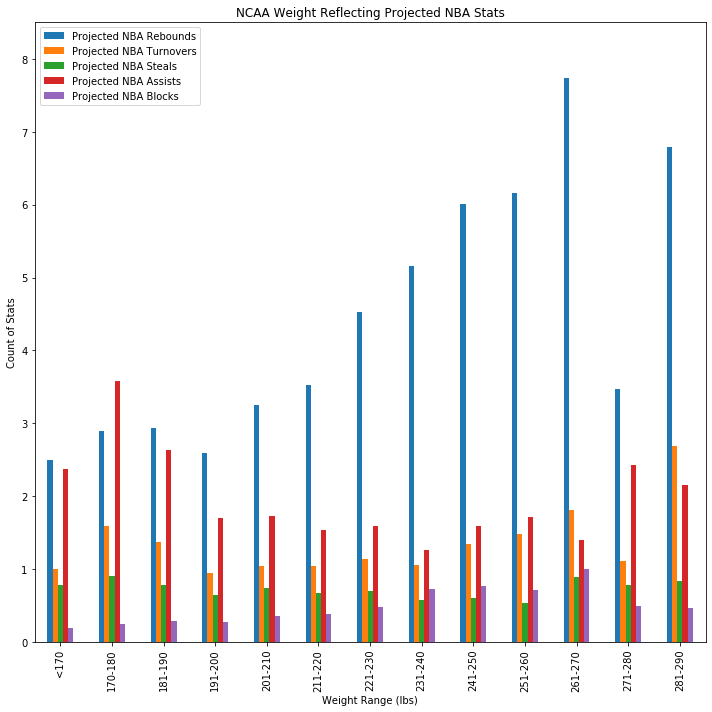

In [11]:
# Plot multi-line bar graphs to exhibit general trends for weight
weight_chart = weight_data.plot(kind = 'bar', figsize = (10,10), legend = 'best', ylim = (0,8.5))
weight_chart.set_title('NCAA Weight Reflecting Projected NBA Stats')
weight_chart.set_xlabel('Weight Range (lbs)')
weight_chart.set_ylabel ('Count of Stats')
plt.tight_layout()
plt.savefig('ProjectPlots/BinnedWeight.png')
plt.show()

In [12]:
# Similar concept for bining the range of NCAA height. Find the min and max and create a bin range that was suitable
bins = [0,74,76,78,80,82,84,86]
group_labels = ['<75','75-76','77-78','79-80','81-82','83-84','85+']
# Again we are grouping players by their college height and extracting the NBA data in order to examine the transition
nba_df['NCAA Height Range'] = pd.cut(ncaa_df['Career Height'], bins, labels = group_labels, include_lowest = True)
# Group by height and gather averages for the data set
ncaa_height_nba_stats = nba_df.groupby('NCAA Height Range')
rebounds_per_game_height = ncaa_height_nba_stats['RPG'].mean()
turnovers_per_game_height = ncaa_height_nba_stats['TPG'].mean()
steals_per_game_height = ncaa_height_nba_stats['SPG'].mean()
assists_per_game_height = ncaa_height_nba_stats['APG'].mean()
blocks_per_game_height = ncaa_height_nba_stats['BPG'].mean()
# place new data into dataframe 
height_data = pd.DataFrame({'Projected NBA Rebounds': rebounds_per_game_height,
                            'Projected NBA Turnovers': turnovers_per_game_height,
                            'Projected NBA Steals': steals_per_game_height,
                            'Projected NBA Assists': assists_per_game_height,
                            'Projected NBA Blocks': blocks_per_game_height})

height_data

,Projected NBA Rebounds,Projected NBA Turnovers,Projected NBA Steals,Projected NBA Assists,Projected NBA Blocks
NCAA Height Range,,,,,
<75,2.827591,1.417367,0.854996,3.247872,0.268677
75-76,2.680652,1.341234,0.776680,2.607242,0.244785
77-78,2.901405,1.085771,0.718473,1.883265,0.289980
79-80,3.774447,1.077956,0.724186,1.595010,0.376133
81-82,4.717400,1.088209,0.587602,1.333171,0.553294
83-84,5.929855,1.198316,0.533768,1.291840,0.983079
85+,6.981515,1.292265,0.473150,1.178974,0.817103


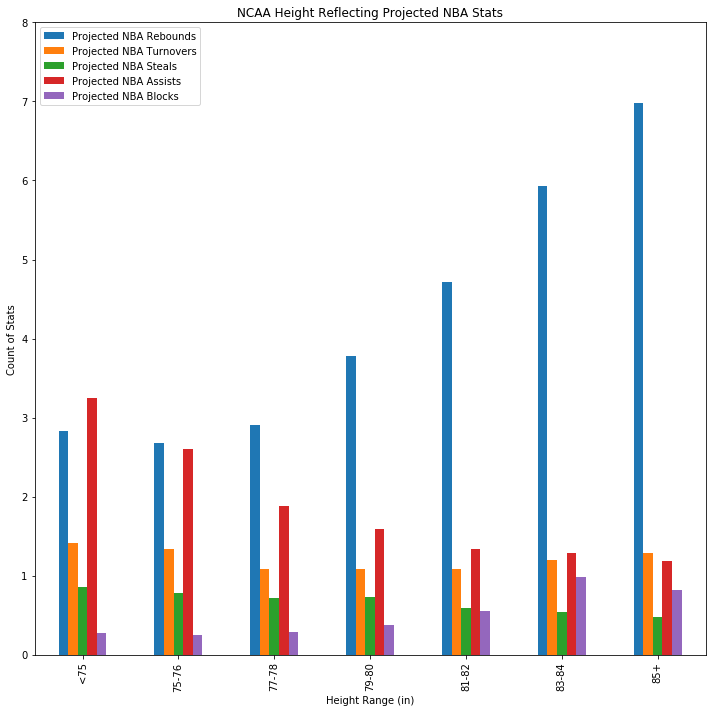

In [13]:
# Plot multi-line bar graphs to exhibit general trends for height
height_chart = height_data.plot(kind = 'bar', figsize = (10,10), legend = 'best', ylim = (0,8))
height_chart.set_title('NCAA Height Reflecting Projected NBA Stats')
height_chart.set_xlabel('Height Range (in)')
height_chart.set_ylabel ('Count of Stats')
plt.tight_layout()
plt.savefig('ProjectPlots/BinnedHeight.png')
plt.show()

In [14]:
# Bin the range of field goal percentages that were exhibited in college
bins = [.188,.30,.35,.40,.45,.50,.55,.60,.65,.70,.728]
group_labels = ['<.30','.30-.35','.36-.40','.41-.45','.46-.50','.51-.55','.56-.60','.61-.65','.66-.70','.70+']
# Looking at NCAA field goal percentages and current NBA stats in order to determine the transition they made
nba_df['NCAA Field Goal Percentage Range'] = pd.cut(ncaa_df['Career Field Goal Percentage'], bins, labels = group_labels, include_lowest = True)
# Group by field goal percentage and gather averages
ncaa_fg_nba_stats = nba_df.groupby('NCAA Field Goal Percentage Range')
usage_percentage_per_fg = ncaa_fg_nba_stats['Career Usage Percentage'].mean()
offensive_win_shares_per_fg = ncaa_fg_nba_stats['Offensive Win Shares'].mean()
PER_per_fg = ncaa_fg_nba_stats['Career PER'].mean()
ppg__per_fg = ncaa_fg_nba_stats['PPG'].mean()
# Place new data into dataframe
fg_data = pd.DataFrame({'Projected NBA Usage Percentage': usage_percentage_per_fg,
                        'Projected NBA Offensive Win Shares': offensive_win_shares_per_fg,
                        'Projected NBA PER': PER_per_fg,
                        'Projected NBA PPG':ppg__per_fg})

fg_data

,Projected NBA Usage Percentage,Projected NBA Offensive Win Shares,Projected NBA PER,Projected NBA PPG
NCAA Field Goal Percentage Range,,,,
<.30,16.750000,0.450000,11.350000,3.942857
.30-.35,19.266667,2.800000,15.166667,7.485205
.36-.40,18.027778,3.511111,10.433333,6.434549
.41-.45,19.034646,7.756693,11.882677,9.103088
.46-.50,18.884483,10.390517,13.343966,9.551910
.51-.55,18.265574,12.783607,14.003279,8.975434
.56-.60,18.007895,14.686842,16.213158,9.511106
.61-.65,20.050000,16.616667,18.441667,12.196503
.66-.70,21.483333,1.583333,14.950000,9.992833


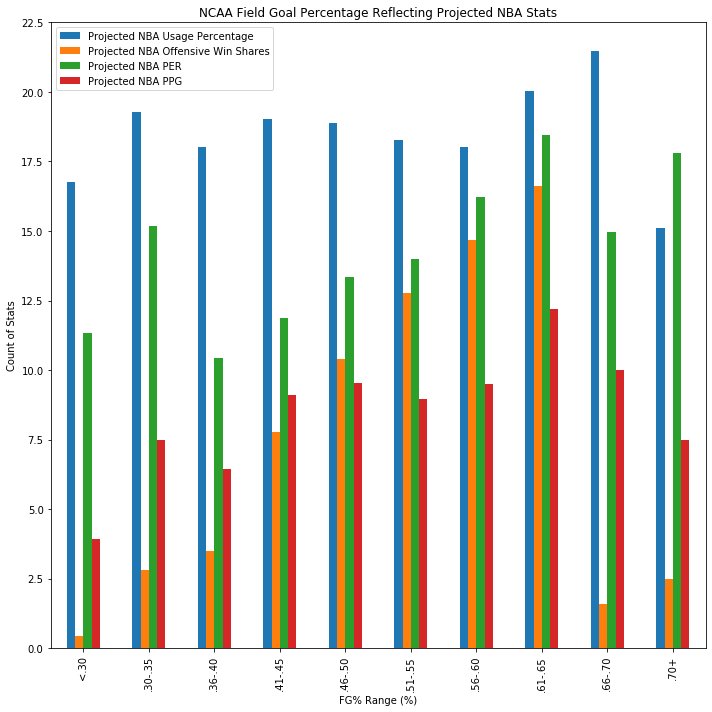

In [15]:
# Plot multi-line bar graphs to exhibit general trends for field goal percentages
FG_chart = fg_data.plot(kind = 'bar', figsize = (10,10), legend = 'best', ylim = (0,22.5)) 
FG_chart.set_title('NCAA Field Goal Percentage Reflecting Projected NBA Stats')
FG_chart.set_xlabel('FG% Range (%)')
FG_chart.set_ylabel ('Count of Stats')
plt.tight_layout()
plt.savefig('ProjectPlots/BinnedFG.png')
plt.show()